In [24]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
scenario = "testing"
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 13})
plt.rc('ytick', labelsize=13) 
plt.rc('xtick', labelsize=13) 

In [25]:
scenarios = ["NL-iteration1", "NL-doublehydrogenprice"]

In [26]:
results = "_" .join(scenarios)
results = results  +"DispatchAnlaysis"
path_to_plots = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) , "amiris_workflow" , "output", results)
if not os.path.exists(path_to_plots):
    os.mkdir(path_to_plots)

In [27]:
results

'NL-iteration1_NL-doublehydrogenpriceDispatchAnlaysis'

In [28]:
# energy_exchange = {}
# for i in scenarios:
#     df_name = f'df_{i}'  # Create a unique name for each DataFrame
#     path_to_results1 =os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) , "amiris_workflow" , "output",  i+".xlsx")
#     data =  pd.read_excel(path_to_results1, sheet_name='energy_exchange', index_col=0)
#     energy_exchange[df_name] = pd.DataFrame(data)

In [29]:
energy_exchange = {}

for i in scenarios:
    df_name = f'df_{i}'  # Create a unique name for each DataFrame \plots\Scenarios\NL-noSR
    path_to_results1 =os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) , "emlabpy" , "plots", "Scenarios",  i, "2089.xlsx")
    data =  pd.read_excel(path_to_results1, sheet_name='energy_exchange', index_col=0)
    energy_exchange[df_name] = pd.DataFrame(data)


In [45]:
energy_exchange["df_NL-doublehydrogenprice"]["ElectricityPriceInEURperMWH"].unique()

array([4.85802529e+01, 1.08130015e+01, 3.05854805e+00, 2.90974339e+00,
       2.88086274e+00, 3.12017933e+00, 3.08921000e+00, 2.96837618e+00,
       2.93891357e+00, 6.60000000e+01, 3.02819044e+00, 2.85226875e+00,
       2.27076710e+02, 2.27132730e+02, 2.50000000e+02, 2.27182328e+02,
       5.00000000e+02, 1.50000000e+03, 2.27100479e+02, 2.27149098e+02,
       2.27216228e+02, 4.00000000e+03, 2.86653009e+00, 2.82395856e+00,
       2.80990902e+00, 2.79592937e+00, 2.78201928e+00, 2.76817838e+00,
       2.74070284e+00])

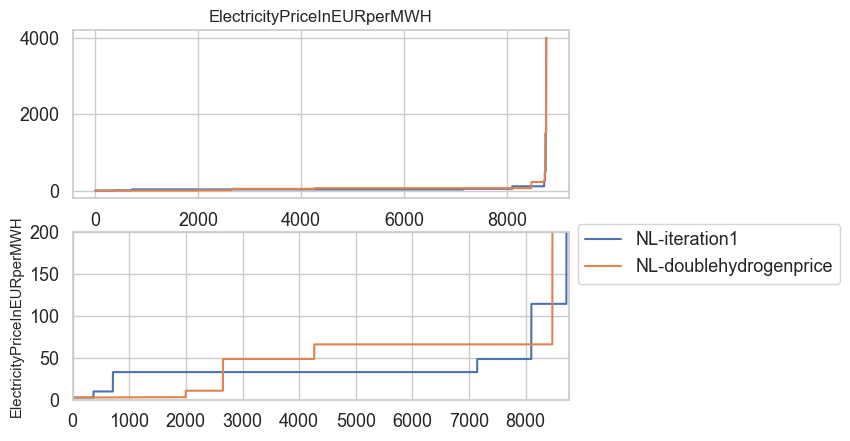

In [42]:

fig, axes= plt.subplots(nrows=2, ncols=1)
for df_name, df in energy_exchange.items():
    sorted_elec_prices = df["ElectricityPriceInEURperMWH"].copy()    
    sorted_elec_prices.sort_values(ignore_index=True, inplace=True)
    axs1 = sorted_elec_prices.plot(ax=axes[0])
    plt.xlim([0, 8760])
    plt.ylim([0, 200])
    axs2 = sorted_elec_prices.plot(ax=axes[1])
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('ElectricityPriceInEURperMWH', fontsize='small')
axes[0].set_title('ElectricityPriceInEURperMWH')

fig.savefig(path_to_plots + '/' + 'elec_prices.png', bbox_inches='tight', dpi=300) 

In [31]:
residual_load = {}
for i in scenarios:
    df_name = f'df_{i}'  # Create a unique name for each DataFrame

    path_to_results1 =os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) , "emlabpy" , "plots", "Scenarios",  i, "2089.xlsx")
    data =  pd.read_excel(path_to_results1, sheet_name='residual_load', index_col=0)
    residual_load[df_name] = pd.DataFrame(data)

In [32]:
residual_load

{'df_NL-iteration1':             residual_load
 Unnamed: 0               
 0              21814.1936
 1              20690.5959
 2              19399.0298
 3              17203.3985
 4              16550.6280
 ...                   ...
 8755           50291.0657
 8756           48621.2877
 8757           47333.1335
 8758           45988.7686
 8759           44346.2201
 
 [8760 rows x 1 columns],
 'df_NL-doublehydrogenprice':             residual_load_actual_infeed  planned_demand  res_potential  \
 Unnamed: 0                                                               
 0                            -3376.8236      57662.5897     61039.4134   
 1                            -5061.5790      57429.6899     62491.2689   
 2                            -6877.4394      57031.1796     63908.6191   
 3                           -10472.6386      56738.8000     67211.4386   
 4                           -11565.3999      56819.6355     68385.0355   
 ...                                 ...       

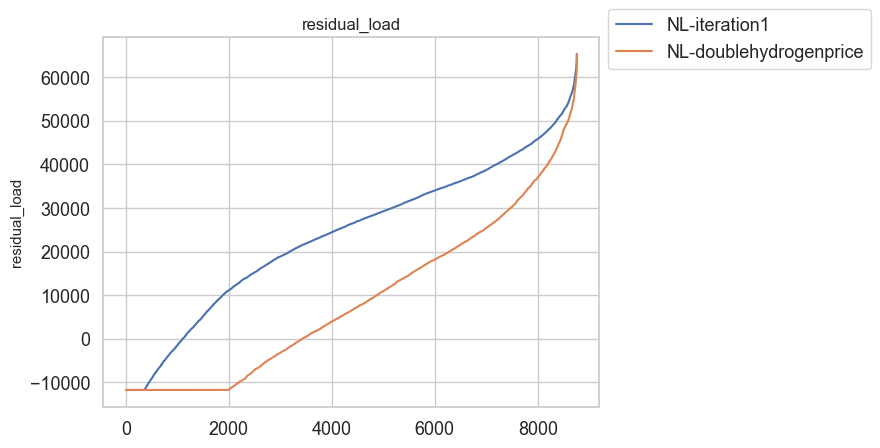

In [33]:
fig, axes= plt.subplots(nrows=1, ncols=1)
for df_name, df in residual_load.items():
    if "residual_load_actual_infeed" in df.columns:
        sorted_residual_load = df["residual_load_actual_infeed"].copy()   
    else:
        sorted_residual_load = df["residual_load"].copy()  
      
    sorted_residual_load.sort_values(ignore_index=True, inplace=True)
    axs1 = sorted_residual_load.plot()
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('residual_load', fontsize='small')
axes.set_title('residual_load')

fig.savefig(path_to_plots + '/' + 'residual_load.png', bbox_inches='tight', dpi=300) 

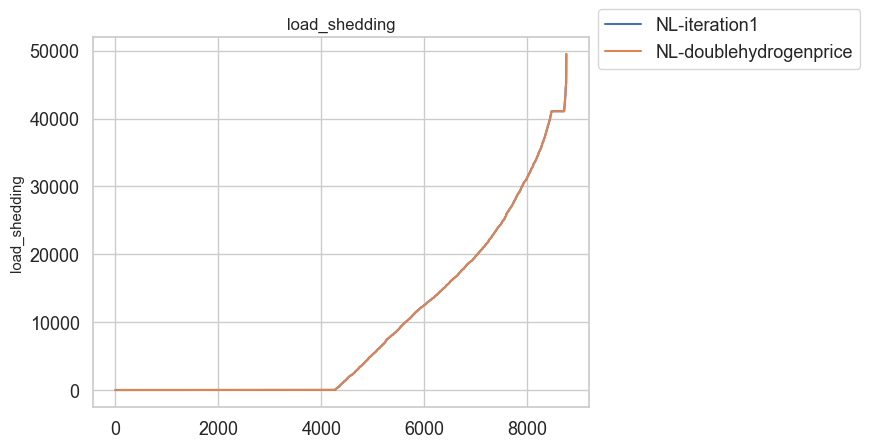

In [34]:
hourly_generation = {}
for i in scenarios:
    df_name = f'df_{i}'  # Create a unique name for each DataFrame
    #path_to_results1 =os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ) , "amiris_workflow" , "output",  i+".xlsx")
    data =  pd.read_excel(path_to_results1, sheet_name='hourly_generation', index_col=0)
    hourly_generation[df_name] = pd.DataFrame(data)
    
fig, axes= plt.subplots(nrows=1, ncols=1)
for df_name, df in hourly_generation.items():
    sorted_load_shedding = df["load_shedding"].copy()    
    sorted_load_shedding.sort_values(ignore_index=True, inplace=True)
    axs1 = sorted_load_shedding.plot()
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('load_shedding', fontsize='small')
axes.set_title('load_shedding')

fig.savefig(path_to_plots + '/' + 'load_shedding_all.png', bbox_inches='tight', dpi=300)     

LOLEdf_NL-iteration1   6 GWh
LOLEdf_NL-doublehydrogenprice   6 GWh


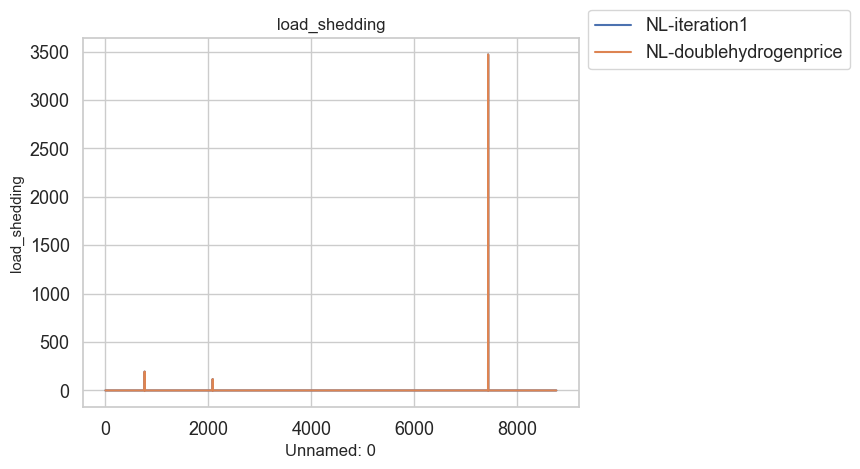

In [35]:
fig, axes= plt.subplots(nrows=1, ncols=1)
for df_name, df in hourly_generation.items():
    load_shedding = df["unit_400000000"].copy()
    print("LOLE" + df_name +"   " +  str(int((load_shedding.sum()/1000))) + " GWh")
    axs1 = load_shedding.plot()
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('load_shedding', fontsize='small')
axes.set_title('load_shedding')

fig.savefig(path_to_plots + '/' + 'load_shedding.png', bbox_inches='tight', dpi=300) 

40187396.98585605
40187396.98585605


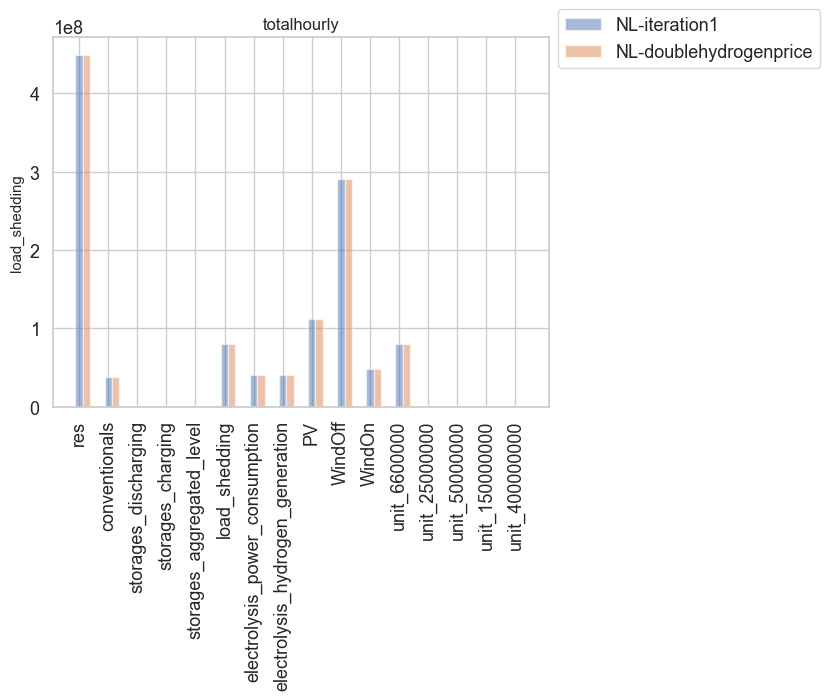

In [36]:
fig, axes= plt.subplots(nrows=1, ncols=1)
n = 0
for df_name, df in hourly_generation.items():
 #   df = df[["unit_25000000","unit_50000000"  ,"unit_150000000" , "unit_400000000"]]

    totalhourly = df.sum(axis=0)
    print(totalhourly["electrolysis_hydrogen_generation"])
    offset = 0.25 * n
    width = 0.25
    x = np.arange(len(totalhourly))
    axes.bar( offset + x, totalhourly, width,   alpha=0.5)
    n =+ 1 
plt.legend(scenarios, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
plt.ylabel('load_shedding', fontsize='small')
plt.xticks(rotation=90)
axes.set_title('totalhourly')
axes.set_xticks(x, totalhourly.index)
fig.savefig(path_to_plots + '/' + 'totalhourly.png', bbox_inches='tight', dpi=300) 

In [37]:
totalhourly

res                                 4.493642e+08
conventionals                       3.785417e+07
storages_discharging                0.000000e+00
storages_charging                   0.000000e+00
storages_aggregated_level           0.000000e+00
load_shedding                       8.049010e+07
electrolysis_power_consumption      4.018740e+07
electrolysis_hydrogen_generation    4.018740e+07
PV                                  1.116009e+08
WindOff                             2.903970e+08
WindOn                              4.736629e+07
unit_6600000                        8.038337e+07
unit_25000000                       4.431000e+04
unit_50000000                       2.841226e+04
unit_150000000                      2.712580e+04
unit_400000000                      6.881475e+03
dtype: float64